df : 모든 feature 전처리 완료

df2 : 사용할 feature만 남김

X_train, y_train : oversampling 처리 x

X_train_balanced, y_train_balanced : oversampling 처리 o

In [ ]:
import pandas as pd
import numpy as np


data source https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

In [ ]:
# 캐글 데이터셋 가져오기
# 참고한 코드 https://kubig-2021-2.tistory.com/35

In [ ]:
!pip install kaggle
from google.colab import files
files.upload() # 캐글 api 파일 업로드하면 됨

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chaiwonhwang","key":"8f3fbbd456bb16255c7294c186ab7692"}'}

In [ ]:
ls -1ha kaggle.json

kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 주소 앞에 ! 붙이기
!kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease

 96% 3.00M/3.13M [00:00<00:00, 5.59MB/s]
100% 3.13M/3.13M [00:00<00:00, 4.91MB/s]


In [ ]:
!unzip '/content/personal-key-indicators-of-heart-disease.zip'

Archive:  /content/personal-key-indicators-of-heart-disease.zip
  inflating: heart_2020_cleaned.csv  


데이터 전처리 참고
https://bigdaheta.tistory.com/15
https://ai-creator.tistory.com/577

In [ ]:
df = pd.read_csv('/content/heart_2020_cleaned.csv')

In [ ]:
df.shape

(319795, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
#check null
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [ ]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,No,46.56,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [ ]:
bins = [0, 18.5, 23, 25, 30, np.inf]
names = ['Underweight (BMI < 18.5)', 'Normal weight (18.5 <= BMI < 23.0)', 'Overweight (23.0 <= BMI < 25.0)', 'Obese (25.0 <= BMI < 30.0)', 'Extremly Obese (BMI >= 30.0)']
df['BMICategory'] = pd.cut(df['BMI'], bins, labels=names)
df.drop('BMI',axis=1,inplace=True)

In [ ]:
df['BMICategory'].value_counts()

Obese (25.0 <= BMI < 30.0)            114355
Extremly Obese (BMI >= 30.0)          102548
Normal weight (18.5 <= BMI < 23.0)     52845
Overweight (23.0 <= BMI < 25.0)        44933
Underweight (BMI < 18.5)                5114
Name: BMICategory, dtype: int64

In [ ]:
df.tail()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICategory
319790,Yes,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No,Obese (25.0 <= BMI < 30.0)
319791,No,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No,Obese (25.0 <= BMI < 30.0)
319792,No,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No,Overweight (23.0 <= BMI < 25.0)
319793,No,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No,Extremly Obese (BMI >= 30.0)
319794,No,No,No,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No,Extremly Obese (BMI >= 30.0)


change the categorical features into numerical values

In [ ]:
df['HeartDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Smoking'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['AlcoholDrinking'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Stroke'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['DiffWalking'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['Sex'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [ ]:
df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [ ]:
df['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [ ]:
df['PhysicalActivity'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [ ]:
df['Asthma'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['KidneyDisease'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df['SkinCancer'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['BMICategory'].unique()

['Underweight (BMI < 18.5)', 'Normal weight (18.5 <= BMI < 23.0)', 'Obese (25.0 <= BMI < 30.0)', 'Overweight (23.0 <= BMI < 25.0)', 'Extremly Obese (BMI >= 30.0)']
Categories (5, object): ['Underweight (BMI < 18.5)' < 'Normal weight (18.5 <= BMI < 23.0)' <
                         'Overweight (23.0 <= BMI < 25.0)' < 'Obese (25.0 <= BMI < 30.0)' <
                         'Extremly Obese (BMI >= 30.0)']

In [ ]:
categories = {"Yes": 1, "No": 0}
df['HeartDisease']= df['HeartDisease'].map(categories)
df['Smoking']= df['Smoking'].map(categories)
df['AlcoholDrinking']= df['AlcoholDrinking'].map(categories)
df['Stroke']= df['Stroke'].map(categories)
df['DiffWalking']= df['DiffWalking'].map(categories)
df['PhysicalActivity']= df['PhysicalActivity'].map(categories)
df['Asthma']= df['Asthma'].map(categories)
df['KidneyDisease']= df['KidneyDisease'].map(categories)
df['SkinCancer']= df['SkinCancer'].map(categories)

categories = {"Female": 1, "Male": 0}
df['Sex']= df['Sex'].map(categories)


In [ ]:

categories = {"Yes": 1, "No": 0, "No, borderline diabetes": 2, "Yes (during pregnancy)": 3}
df['Diabetic']= df['Diabetic'].map(categories)

In [ ]:
categories = {"18-24":0, "25-29":1, "30-34":2, "35-39":3, "40-44":4, "45-49":5, "50-54":6, "55-59":7, "60-64":8, "65-69":9, "70-74":10, "75-79":11, "80 or older":12}
df['AgeCategory']= df['AgeCategory'].map(categories)

categories = {"White":0, "Black":1, "Asian":2, "American Indian/Alaskan Native":3, "Hispanic":4, "Other":5}
df['Race']= df['Race'].map(categories)

categories = {"Poor":0, "Fair":1, "Good":2, "Very good":3, "Excellent":4}
df['GenHealth']= df['GenHealth'].map(categories)

categories = {"Underweight (BMI < 18.5)":0, "Normal weight (18.5 <= BMI < 23.0)":1, "Overweight (23.0 <= BMI < 25.0)":2, "Obese (25.0 <= BMI < 30.0)":3, "Extremly Obese (BMI >= 30.0)":4}
df['BMICategory']= df['BMICategory'].map(categories)

In [ ]:
# NaN 값 있는지 확인
df.isnull().values.any()

False

In [ ]:
df.tail()

,HeartDisease,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMICategory
319790,1,1,0,0,7.0,0.0,1,0,8,4,1,0,1,6.0,1,0,0,3
319791,0,1,0,0,0.0,0.0,0,0,3,4,0,1,3,5.0,1,0,0,3
319792,0,0,0,0,0.0,0.0,0,1,5,4,0,1,2,6.0,0,0,0,2
319793,0,0,0,0,0.0,0.0,0,1,1,4,0,0,2,12.0,0,0,0,4
319794,0,0,0,0,0.0,0.0,0,1,12,4,0,1,2,8.0,0,0,0,4


In [ ]:
# 나중에 중요도 필요할 것 같아서 일단은 df2로 따로 저장해둠
df2 = df.drop(['Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Race', 'Diabetic', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)

In [ ]:
df2.tail()

,HeartDisease,Smoking,AlcoholDrinking,Sex,AgeCategory,PhysicalActivity,SleepTime,BMICategory
319790,1,1,0,0,8,0,6.0,3
319791,0,1,0,0,3,1,5.0,3
319792,0,0,0,1,5,1,6.0,2
319793,0,0,0,1,1,0,12.0,4
319794,0,0,0,1,12,1,8.0,4


imbalancing problem

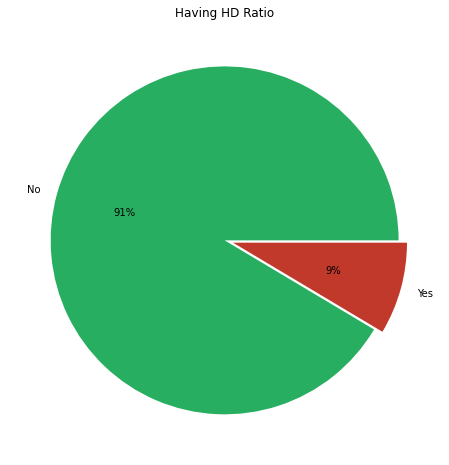

In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(df2['HeartDisease'].value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05),colors=['#27ae60','#c0392b'])
ax.set_title('Having HD Ratio')
fig.show()

In [ ]:
X = df2.drop('HeartDisease',axis=1)
Y = df2['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
from imblearn.over_sampling import SMOTE
over = SMOTE(k_neighbors=2000)
X_train_balanced,y_train_balanced = over.fit_resample(X_train, y_train)

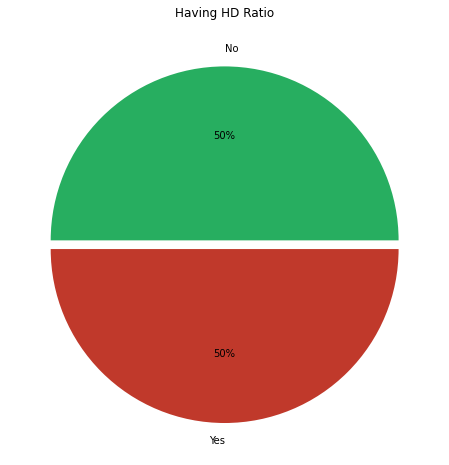

In [ ]:
fig, ax = plt.subplots(1, 1,figsize =(15, 8))
ax.pie(y_train_balanced.value_counts(),autopct='%1.0f%%',labels=['No',"Yes"],explode=(0,0.05),colors=['#27ae60','#c0392b'])
ax.set_title('Having HD Ratio')
fig.show()